In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We will importing the dataset and converting any unknown values as NAN values.

In [4]:
df = pd.read_csv("SalesData.csv",na_values = ["?","#","$","*","@","na"])

In [5]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


We will studying the dataset for better understanding<br>
- Checking for null values<br>
- Analyzing datatypes<br>
- Outlier Detection<br>

In [6]:
df.isnull().sum()

Temperature    0
Revenue        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


C:\Users\K JAYARAMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

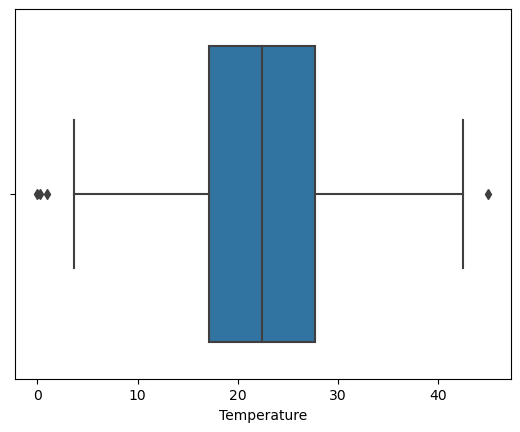

In [8]:
sns.boxplot(df.Temperature)

In [9]:
Q1 = df.Temperature.quantile(0.25)
Q3 = df.Temperature.quantile(0.75)
max = Q3 + 1.5*(Q3-Q1)
min = Q1 - 1.5*(Q3-Q1)
max,min

(43.6682992275, 1.1946327475000054)

Handling outliers using capping technique

In [10]:
def convert(x):
    if x>max:
        return max
    elif x<min:
        return min
    else:
        return x

In [11]:
df.Temperature = df.Temperature.map(convert)

C:\Users\K JAYARAMAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

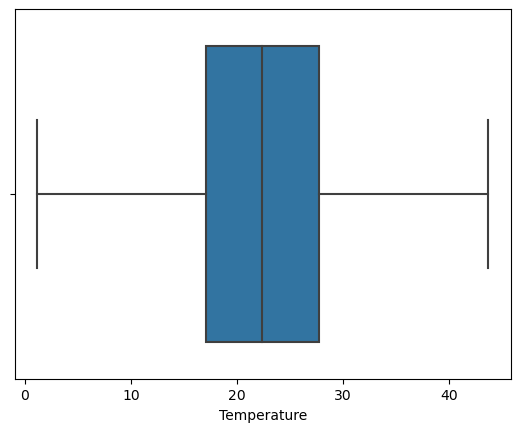

In [12]:
sns.boxplot(df.Temperature)

<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

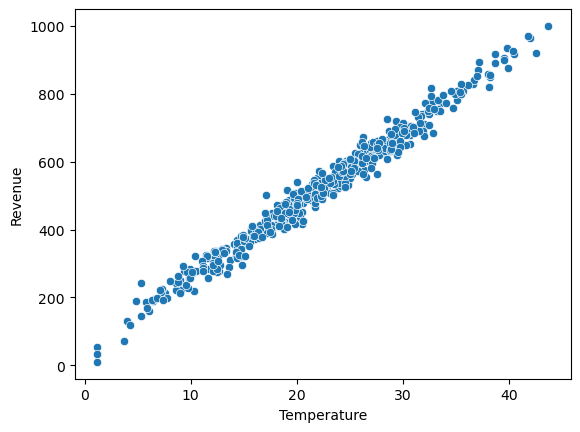

In [13]:
sns.scatterplot(data = df,
               x="Temperature",
               y="Revenue")

Applying regression modeling and getting results.

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
y = df['Revenue']

In [16]:
X = df.drop(['Revenue'], axis = 1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 1), (100, 1), (400,), (100,))

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
lr.coef_

array([21.42740256])

In [21]:
lr.score(X_test,y_test)*100

97.68104198828185

In [22]:
new=[[35]]
lr.predict(new)

C:\Users\K JAYARAMAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([795.75539694])